#Cervical Cancer

<br>
Cervical Cancer Risk Factors for Biopsy: This Dataset is Obtained from UCI Repository and kindly acknowledged!

## Import Libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import io

from google.colab import files

#TensorFlow utils
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Activation

#Evaluating and Modelling
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

## Upload Dataset

In [ ]:
# load dataset
#from google.colab import drive

#drive.mount('/drive')
#data = pd.read_csv('/drive/My Drive/Colab Notebooks/Cervical Cancer.csv')
#data.head()

In [2]:
datasets = files.upload()

Saving kag_risk_factors_cervical_cancer.csv to kag_risk_factors_cervical_cancer.csv


In [14]:
data = pd.read_csv(io.BytesIO(datasets['kag_risk_factors_cervical_cancer.csv']))
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

It seems there are some missing values named as '?', and made the whole column become an object. To do further computation, we have to replace '?' with NaN and turn the object type to numeric type.

## Preprocessing

In [15]:
data.drop_duplicates(inplace=True)
len(data)

835

In [16]:
data = data.replace('?', np.nan)

replacing '**?**' value to NaN. So we can fill the NaN value with ***categorical*** or ***median*** value

In [17]:
data.isnull().sum() #check NaN counts in different columns

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 835 non-null    int64 
 1   Number of sexual partners           810 non-null    object
 2   First sexual intercourse            828 non-null    object
 3   Num of pregnancies                  779 non-null    object
 4   Smokes                              822 non-null    object
 5   Smokes (years)                      822 non-null    object
 6   Smokes (packs/year)                 822 non-null    object
 7   Hormonal Contraceptives             732 non-null    object
 8   Hormonal Contraceptives (years)     732 non-null    object
 9   IUD                                 723 non-null    object
 10  IUD (years)                         723 non-null    object
 11  STDs                                735 non-null    object

Now It's time to fill all the NaN values.
For continuous variable, we fill the median value. (THX for the suggestion in comment)
For categorical variable, we fill 1.

In [19]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,0.089820,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,0.306335,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
data = data.apply(pd.to_numeric, axis=0)

replace object to numerical

In [21]:
# Generating list of categorical factors:
temp=data.drop(columns=['Biopsy']).nunique()
cat=temp.loc[temp.values < 4].index.to_list()

# Updating null values to the most dominant category:
for factor in cat:
    data[factor] = data[factor].fillna(1)

Fill the NaN value to '1'

In [22]:
# Generating list of non-categorical factors:
temp=data.drop(columns=['Biopsy']).nunique()
non_cat=temp.loc[temp.values > 3].index.to_list()

# Implementing interpolation (with linear method), on known data for null values:
for factor in non_cat:
  if (factor == ('STDs: Time since first diagnosis') or factor == ('STDs: Time since last diagnosis')):
    data[factor] = data[factor].fillna(data[factor].median())
  else:
    data[factor]=data[factor].interpolate(method='linear')

Fill the NaN value to Median or using Interpolate. Depend with the conditions

In [9]:
# for continuous variable
#data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].median()) 
#data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())
#data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())
#data['Smokes'] = data['Smokes'].fillna(1)
#data['Smokes (years)'] = data['Smokes (years)'].fillna(data['Smokes (years)'].median())
#data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median())
#data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(1)
#data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())
#data['IUD'] = data['IUD'].fillna(0) # Under suggestion
#data['IUD (years)'] = data['IUD (years)'].fillna(0) #Under suggestion

#data['STDs'] = data['STDs'].fillna(1) 
#data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].median())
#data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].median())
#data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].median())
#data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].median())
#data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].median())
#data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].median())
#data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].median())
#data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].median())
#data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].median())
#data['STDs:AIDS'] = data['STDs:AIDS'].fillna(data['STDs:AIDS'].median())
#data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].median())
#data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].median())
#data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].median())
#data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].fillna(data['STDs: Time since first diagnosis'].median())
#data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].fillna(data['STDs: Time since last diagnosis'].median())

In [23]:
y = data['Biopsy']
X = data.drop('Biopsy',axis=1)

In [24]:
data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


**Data Outline**

<Axes: xlabel='STDs (number)', ylabel='count'>

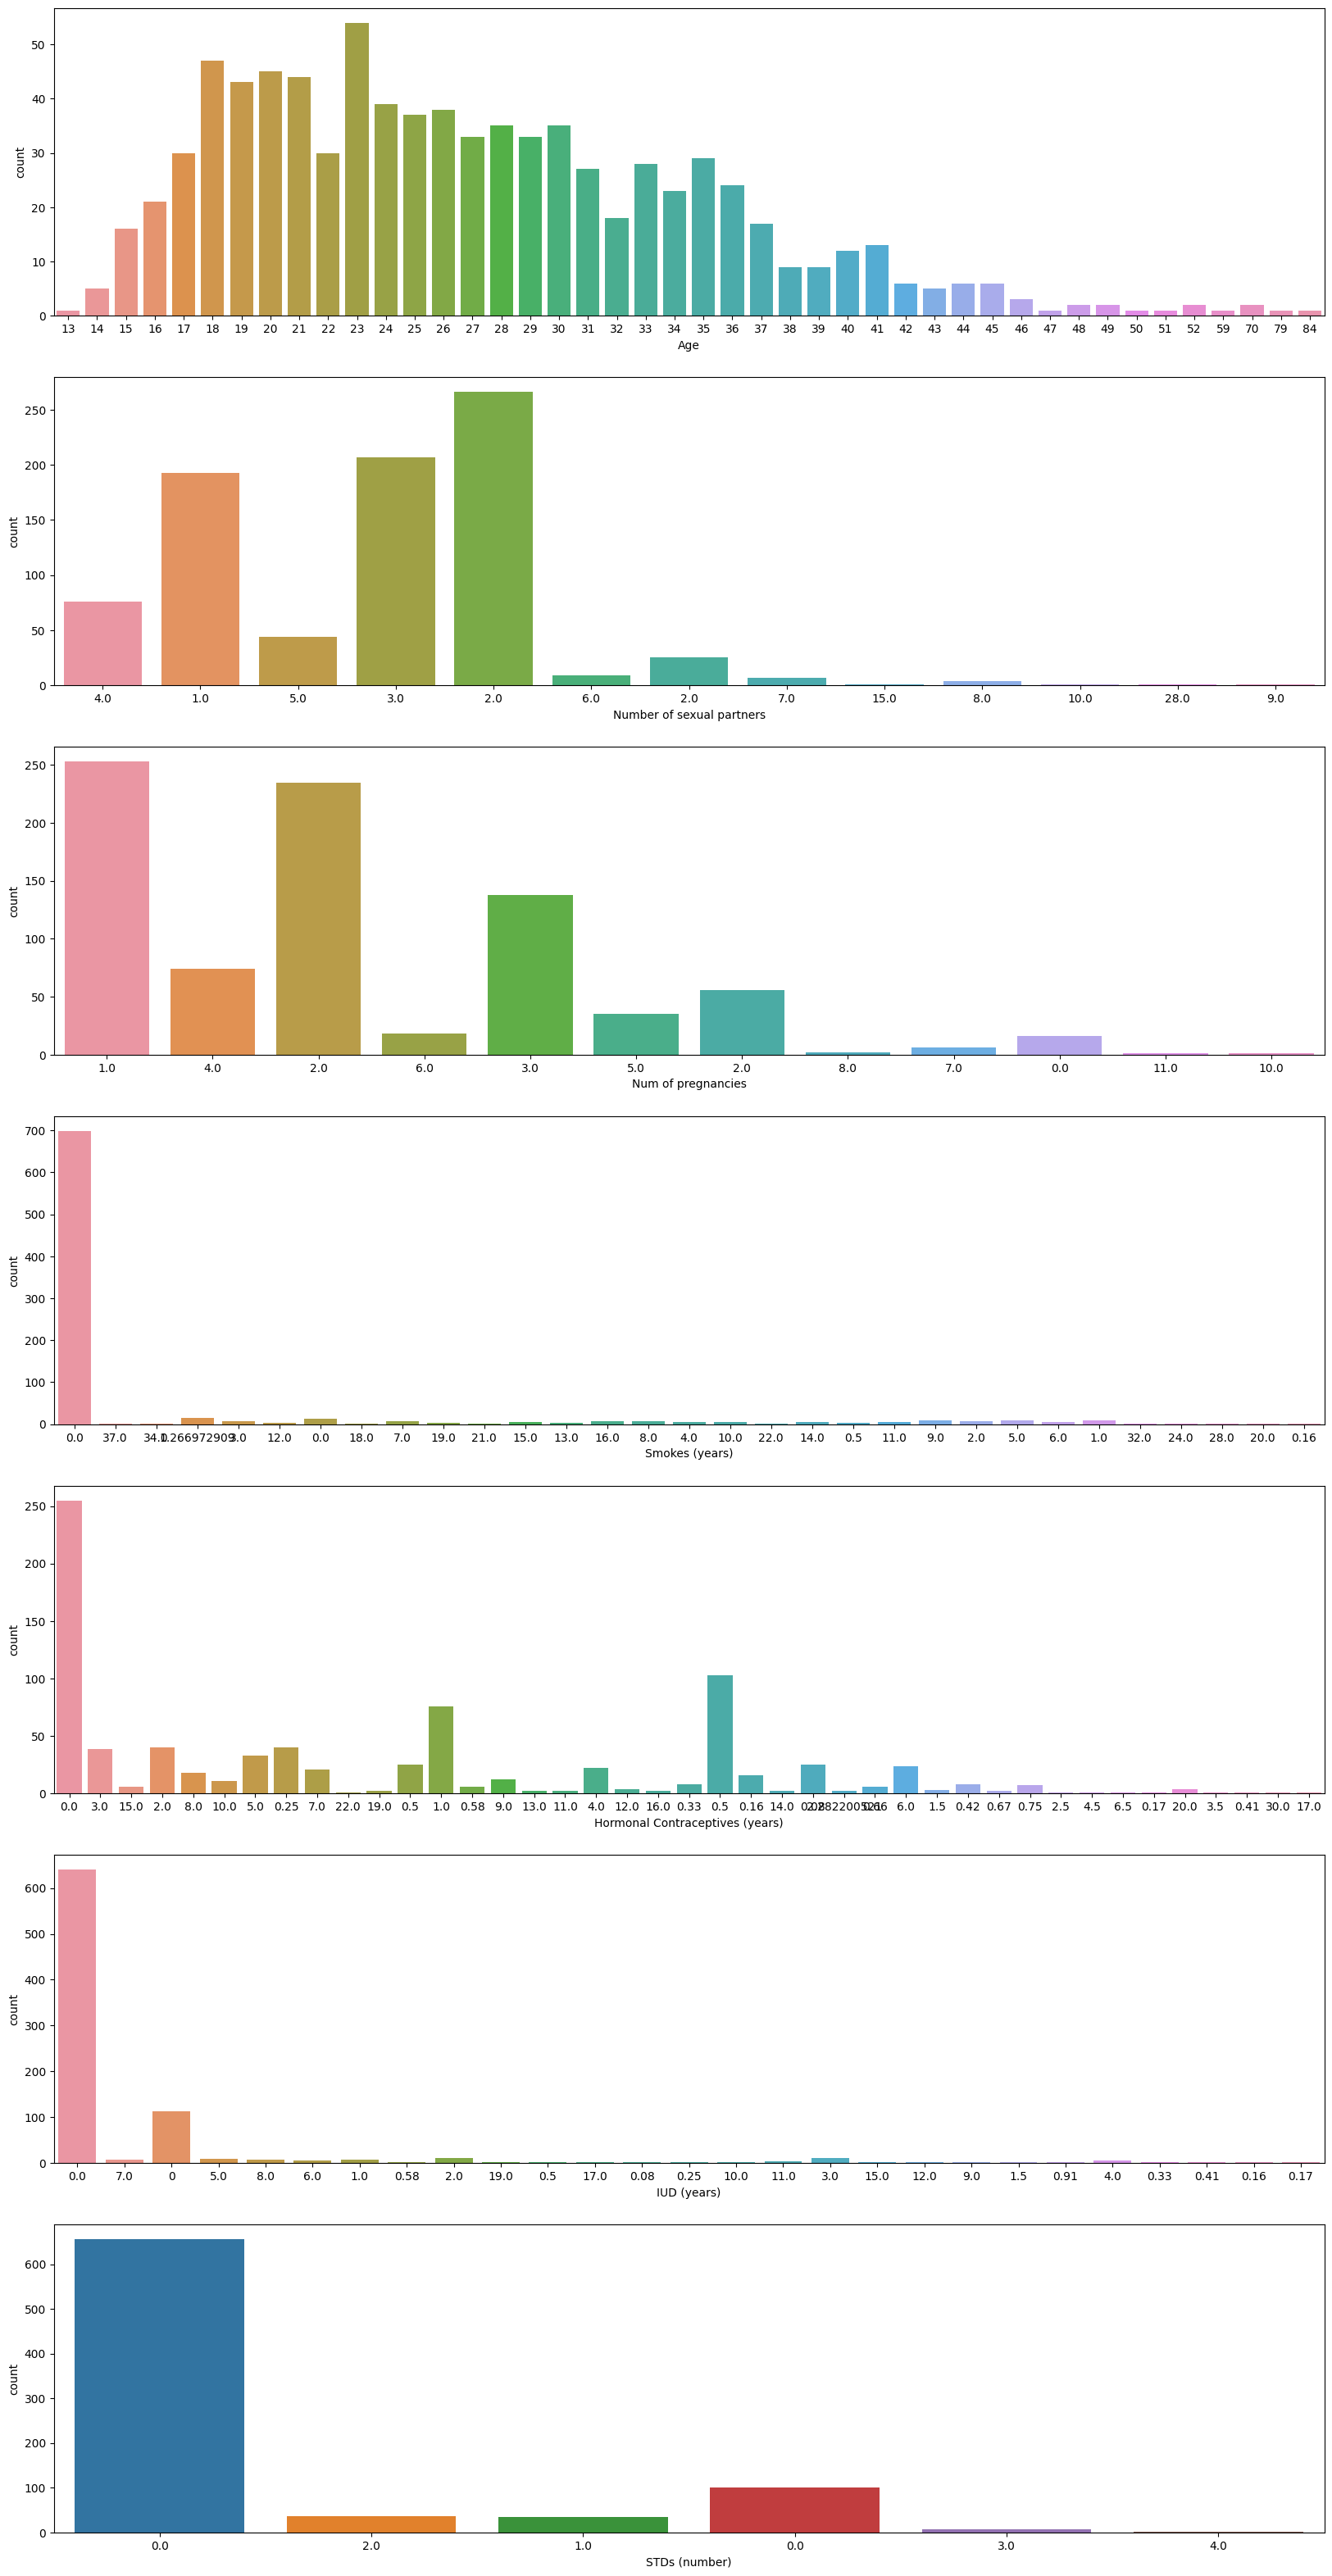

In [13]:
import seaborn as sns

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=data, ax=ax1)
sns.countplot(x='Number of sexual partners', data=data, ax=ax2)
sns.countplot(x='Num of pregnancies', data=data, ax=ax3)
sns.countplot(x='Smokes (years)', data=data, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=data, ax=ax5)
sns.countplot(x='IUD (years)', data=data, ax=ax6)
sns.countplot(x='STDs (number)', data=data, ax=ax7)

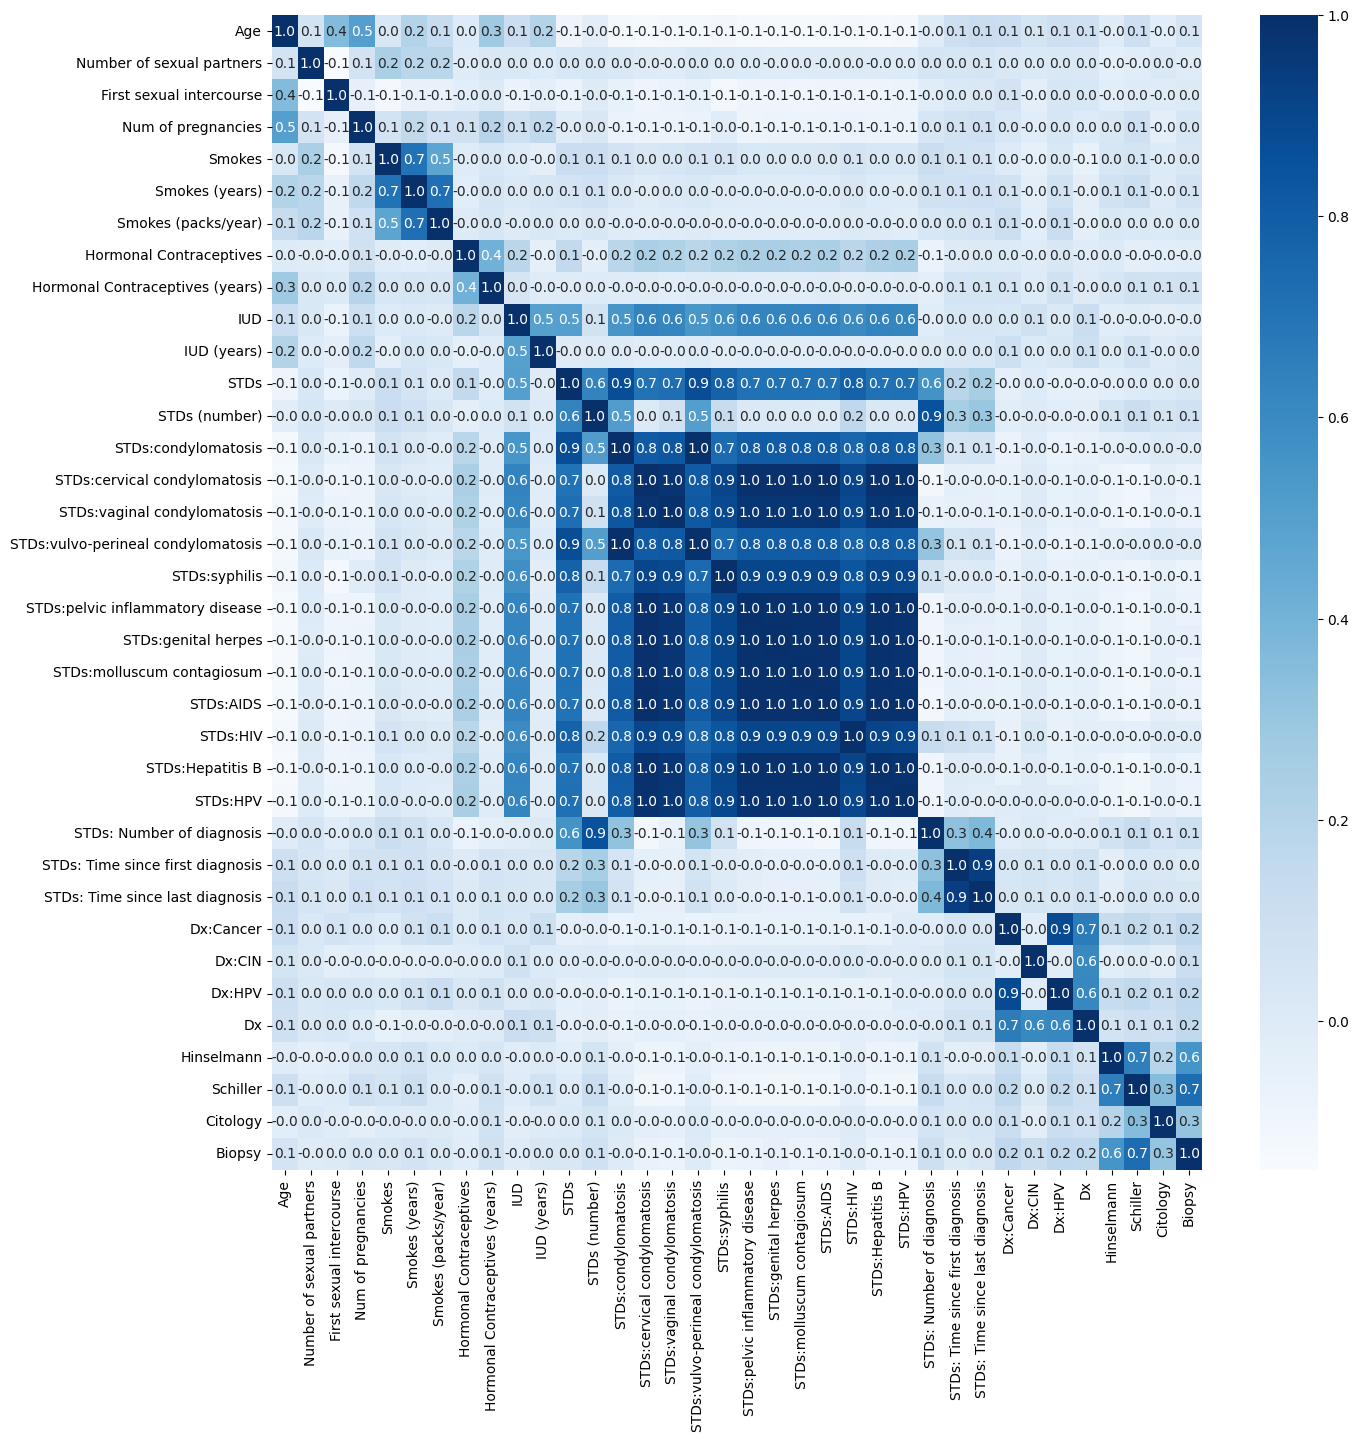

In [25]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot=True, cbar=True, cmap='Blues', fmt='.1f');

The Corellation is **quite positive**. We can see by diagonal-line from Age to Biopsy have positive value (1.0).
<br><br>
We can say all of the feature or columns there. We can use all of them to predict our new dataset later.

## Modeling

We will try to divide the data to ***train-test-validation***.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

In [76]:
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler(feature_range=(0, 1))
X_train = minmax_scale.fit_transform(X_train)
X_val = minmax_scale.fit_transform(X_val)
X_test = minmax_scale.fit_transform(X_test)

Scale the value from 0 to 1 using `MinMaxScaler`, in every train, val, and test set.

In [77]:
from tensorflow.keras import initializers
initializer = tf.keras.initializers.HeNormal(seed=0)

model = Sequential(
    [
        Dense(32, activation = 'relu', kernel_initializer=initializer, input_shape=[35]),
        Dense(16, activation = 'relu', kernel_initializer=initializer),
        Dense(8, activation = 'relu', kernel_initializer=initializer),
        Dense(4, activation = 'relu', kernel_initializer=initializer),
        #Dense(1, activation = 'sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0)),
        Dense(1, activation = 'sigmoid'),
     
    ]
)

model.build()

`tf.keras.initializers.HeNormal(seed=0)` ---- is a popular **weight initialization** technique specifically designed for layers that use the **ReLU** (*Rectified Linear Unit*) activation function or its variants. It aims to provide a good initialization strategy to address the vanishing gradient problem and promote stable and efficient training.
<br><br>
`HeNormal` initializer initializes the weights by drawing random samples from a truncated normal distribution with a mean of 0 and a standard deviation calculated using He's initialization formula.
<br><br>
The `seed` parameter is used to set the random seed for reproducibility. By providing a specific seed value, you can ensure that the weight initialization is consistent across different runs of your model.

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                1152      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 4)                 36        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, 
                        epochs=150, batch_size=32,
                        validation_data=(X_val, y_val), 
                        shuffle=True)

Epoch 1/150
16/16 [==============================] - 1s 11ms/step - loss: 0.7138 - accuracy: 0.5808 - val_loss: 0.6469 - val_accuracy: 0.9102
Epoch 2/150
16/16 [==============================] - 0s 3ms/step - loss: 0.5899 - accuracy: 0.9261 - val_loss: 0.5143 - val_accuracy: 0.9401
Epoch 3/150
16/16 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.9321 - val_loss: 0.3931 - val_accuracy: 0.9401
Epoch 4/150
16/16 [==============================] - 0s 4ms/step - loss: 0.3629 - accuracy: 0.9321 - val_loss: 0.2824 - val_accuracy: 0.9401
Epoch 5/150
16/16 [==============================] - 0s 3ms/step - loss: 0.2765 - accuracy: 0.9321 - val_loss: 0.2122 - val_accuracy: 0.9401
Epoch 6/150
16/16 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9321 - val_loss: 0.1729 - val_accuracy: 0.9401
Epoch 7/150
16/16 [==============================] - 0s 4ms/step - loss: 0.1895 - accuracy: 0.9321 - val_loss: 0.1525 - val_accuracy: 0.9401
Epoch 8/150


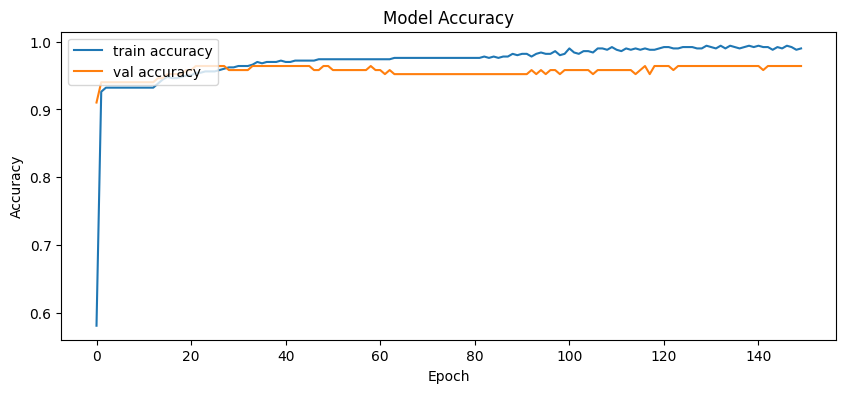

In [80]:
# Visualization model accuracy (train and val accuracy)
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history.history['accuracy'], label = 'train accuracy')
ax.plot(history.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')

plt.show()

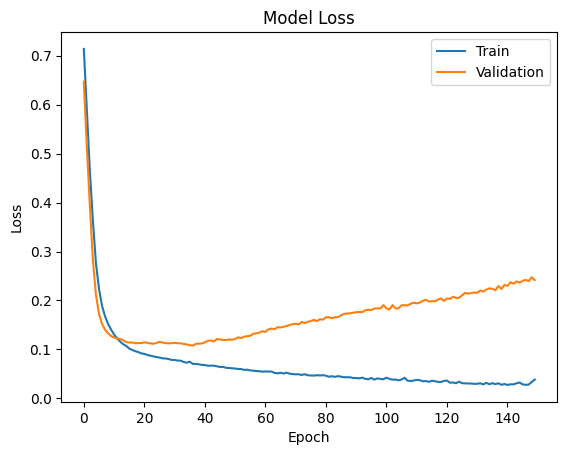

In [81]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [82]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9461
Test loss: 0.18338391184806824
Test accuracy: 0.946107804775238


6/6 [==============================] - 0s 1ms/step
Confusion Matrix


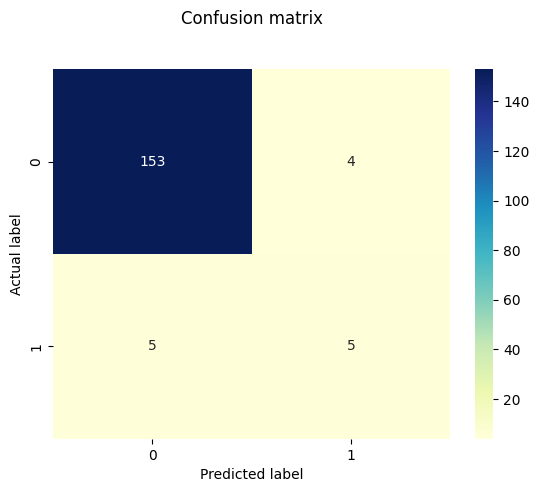

In [83]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = model.predict(X_test)
cm = confusion_matrix(y_true.round(), y_pred.round())

print("Confusion Matrix")
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [84]:
print(classification_report(y_true.round(),y_pred.round()))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       157
           1       0.56      0.50      0.53        10

    accuracy                           0.95       167
   macro avg       0.76      0.74      0.75       167
weighted avg       0.94      0.95      0.94       167



## ML Model

### Random Forest

In [47]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9520958083832335


### Decision Tree

In [49]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9341317365269461


## Save Model

In [85]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [86]:
model.save('my_model.h5')

In [87]:
files.download('saved_model/my_model/variables/variables.data-00000-of-00001')
files.download('saved_model/my_model/variables/variables.index')
files.download('saved_model/my_model/fingerprint.pb')
files.download('saved_model/my_model/keras_metadata.pb')
files.download('saved_model/my_model/saved_model.pb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test Model

In [89]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [90]:
loss, acc = new_model.evaluate(X_test, y_test)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

6/6 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9461
Restored model, accuracy: 94.61%
